In [134]:
PIURA=[{"CP": 2836, "lat": -4.878705, "lon": -79.882942,"ID":1}, 
      {"CP": 2834, "lat": -4.855265, "lon": -79.922737,"ID":1}, 
      {"CP": 2941, "lat": -5.351477, "lon": -80.07145,"ID":1}]

AMAZONAS=[{"CP": 2937, "lat": -5.342662000000001, "lon": -80.062037,"ID":2}, 
      {"CP": 2951, "lat": -5.313269999999999, "lon": -80.054642,"ID":2}, 
      {"CP": 2938, "lat": -5.281735, "lon": -80.06830699999999,"ID":2}]

LORETO=[{"CP": 2942, "lat": -5.243475, "lon": -80.093585,"ID":3}, 
      {"CP": 2946, "lat": -5.242157, "lon": -80.113013,"ID":3}]

LIMA=[{"CP": 3942, "lat": -5.243475, "lon": -70.093585,"ID":4}, 
      {"CP": 3946, "lat": -5.242157, "lon": -70.113013,"ID":4}]

AYACUCHO=[{"CP": 4942, "lat": -5.243475, "lon": -90.093585,"ID":5}, 
      {"CP": 4946, "lat": -5.242157, "lon": -90.113013,"ID":5},
      {"CP": 4947, "lat": -5.242157, "lon": -90.113013,"ID":5},
      {"CP": 4948, "lat": -5.242157, "lon": -90.113013,"ID":5}]

PERU=[AMAZONAS,LORETO,LIMA,AYACUCHO]

In [135]:
import networkx as nx
import math
Grafito = nx.Graph()

#Agregamos todos sus nodos con sus respectivos ID de departamento

for departamento in PERU:
  #print(departamento)
  for i in departamento:
    Grafito.add_node(i["CP"])
    Grafito.nodes[i["CP"]]["ID"]=i["ID"]
    Grafito.nodes[i["CP"]]["LON"]=i["lon"]
    Grafito.nodes[i["CP"]]["LAT"]=i["lat"]

#Agregamos los arcos
  for i in range(len(departamento)-1):
    nodo = departamento[i]["CP"]
    nodo_next = departamento[i+1]["CP"]
    Grafito.add_edge(nodo,nodo_next,weight=math.inf)

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs

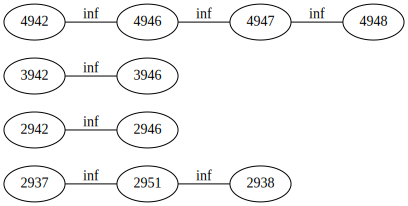

In [141]:
gs.nx2gv(Grafito,weighted=True)

In [142]:
candidatos=[]
for i in Grafito.nodes:
  if len(Grafito[i]) < 2:
    candidatos.append(i)

In [143]:
candidatos

[2937, 2938, 2942, 2946, 3942, 3946, 4942, 4948]

In [144]:
prov_visitadas=[]

In [145]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
 
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    distancia = c*r
    return distancia

In [146]:
import heapq as pq
q = []

while len(candidatos) > 0:#origen
  i = candidatos.pop(0)
  print(candidatos)
  for e in candidatos:#destino
    if Grafito.nodes[i]['ID'] != Grafito.nodes[e]['ID']:
      if not Grafito.nodes[e]['ID'] in prov_visitadas:
        w = haversine(Grafito.nodes[i]['LON'], Grafito.nodes[i]['LAT'], Grafito.nodes[e]['LON'], Grafito.nodes[e]['LAT'])
        pq.heappush(q, (w, e))

  
  #####Encuentro el más cercano con mi cola de prioridad
  if len(q) > 0 :
    n,v = pq.heappop(q)
    ##le pongo arista
    Grafito.add_edge(i,v,weight=n)
    ##Encuentro y añado el origen de la arista hacia prov_visitadas y remuevo este par de candidatos de la lista
    prov_visitadas.append(Grafito.nodes[i]['ID'])
    prov_visitadas.append(Grafito.nodes[v]['ID'])
    candidatos.remove(v)
    q = []


[2938, 2942, 2946, 3942, 3946, 4942, 4948]
[2946, 3942, 3946, 4942, 4948]
[3942, 3946, 4942]
[4942]
[]


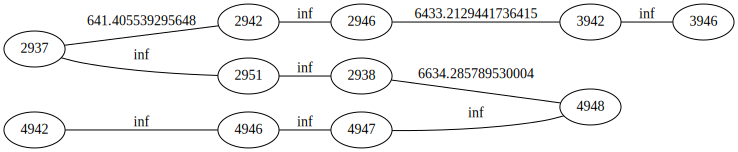

In [147]:
gs.nx2gv(Grafito,weighted=True,params={'rankdir': 'LR', 'size': '50'},)

AdjacencyView({2937: {2951: {'weight': inf}, 2942: {'weight': 641.405539295648}}, 2951: {2937: {'weight': inf}, 2938: {'weight': inf}}, 2938: {2951: {'weight': inf}, 4948: {'weight': 6634.285789530004}}, 2942: {2946: {'weight': inf}, 2937: {'weight': 641.405539295648}}, 2946: {2942: {'weight': inf}, 3942: {'weight': 6433.2129441736415}}, 3942: {3946: {'weight': inf}, 2946: {'weight': 6433.2129441736415}}, 3946: {3942: {'weight': inf}}, 4942: {4946: {'weight': inf}}, 4946: {4942: {'weight': inf}, 4947: {'weight': inf}}, 4947: {4946: {'weight': inf}, 4948: {'weight': inf}}, 4948: {4947: {'weight': inf}, 2938: {'weight': 6634.285789530004}}})